In [1]:
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
local_device_protos

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13566754269771099829, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12451989718171738540
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15753943450
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8158575986756764256
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8005269779346133785
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
import tensorflow as tf
print('Eager Execution On ->', tf.executing_eagerly())
print('Tensorflow Version ->', tf.__version__)

Eager Execution On -> True
Tensorflow Version -> 2.0.0


In [3]:
from config import *
from src.utils import *
from src.dataset import *
from src.models import *
from src.losses import *
from src.training import *

In [4]:
path = download_existing_dataset(EXISTING_DATASETS['cityscapes'], 'cityscapes')
print('Dataset Path ->', path)

Dataset Path -> /home/ubuntu/.keras/datasets/cityscapes


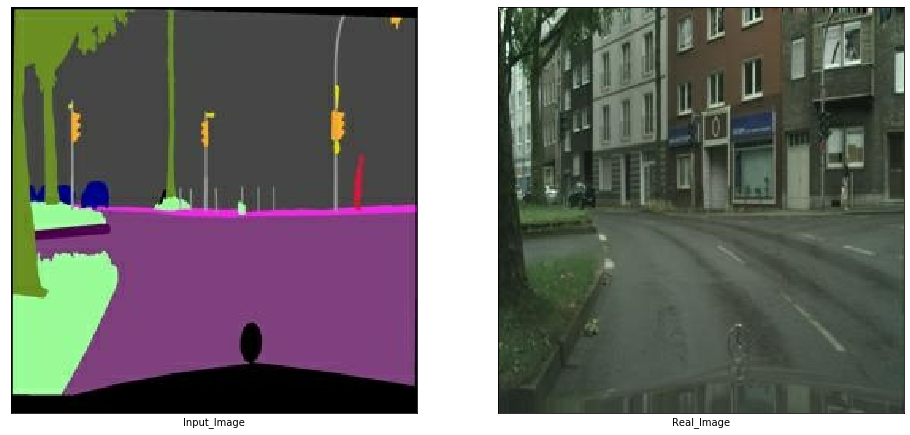

In [5]:
visualize(join(path, 'train/200.jpg'))

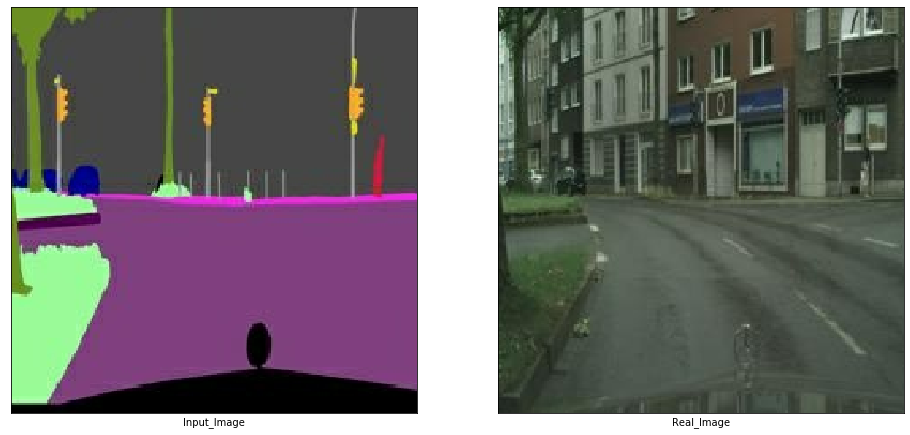

In [6]:
visualize(join(path, 'train/200.jpg'), augment = True)

In [7]:
train_dataset, test_dataset = get_datasets(path)
print(train_dataset)
print(test_dataset)

<DatasetV1Adapter shapes: ((None, 256, 256, 3), (None, 256, 256, 3)), types: (tf.float32, tf.float32)>
<DatasetV1Adapter shapes: ((None, 256, 256, None), (None, 256, 256, None)), types: (tf.float32, tf.float32)>


In [8]:
generator = Generator()
generator.summary()

Model: "Generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, None, 6 3072        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, None, 1 131584      sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, None, None, 2 525312      sequential_1[0][0]               
__________________________________________________________________________________________

In [9]:
discriminator = Discriminator()
discriminator.summary()

Model: "Discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
target_image (InputLayer)       [(None, None, None,  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, None, None, 6 0           input_image[0][0]                
                                                                 target_image[0][0]               
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, None, None, 6 6144        concatenate_1[0][0]  

In [10]:
discriminator_optimizer, generator_optimizer = get_optimizers()
checkpoint, checkpoint_prefix = get_checkpoint(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer
)

0it [00:00, ?it/s]

Epoch 1 going on....


2975it [01:47, 27.71it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 1 is 107.35751938819885 sec

Epoch 2 going on....


2975it [01:39, 29.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 2 is 99.95235252380371 sec

Epoch 3 going on....


2975it [01:39, 29.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 3 is 99.96458888053894 sec

Epoch 4 going on....


2975it [01:40, 29.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 4 is 100.01784157752991 sec

Epoch 5 going on....


2975it [01:39, 29.75it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 5 is 99.99303483963013 sec

Epoch 6 going on....


2975it [01:39, 29.78it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 6 is 99.90545749664307 sec

Epoch 7 going on....


2975it [01:39, 29.76it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 7 is 99.97619605064392 sec

Epoch 8 going on....


2975it [01:40, 29.74it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 8 is 100.02009654045105 sec

Epoch 9 going on....


2975it [01:39, 29.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 9 is 99.9337203502655 sec

Epoch 10 going on....


2975it [01:39, 29.75it/s]


Completed.


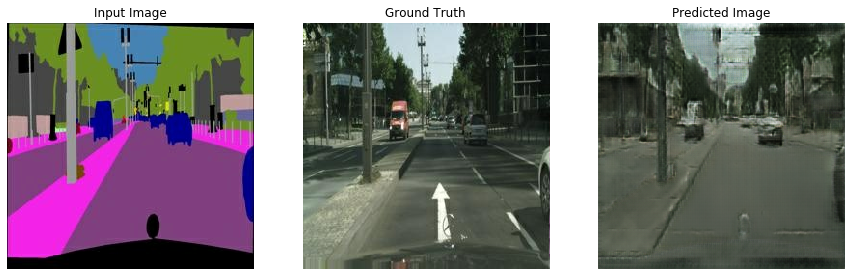

0it [00:00, ?it/s]

Time taken for epoch 10 is 100.59412002563477 sec

Epoch 11 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 11 is 99.81288504600525 sec

Epoch 12 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 12 is 99.837078332901 sec

Epoch 13 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 13 is 99.78864121437073 sec

Epoch 14 going on....


2975it [01:39, 29.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 14 is 99.85410213470459 sec

Epoch 15 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 15 is 99.77577781677246 sec

Epoch 16 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 16 is 99.80787658691406 sec

Epoch 17 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 17 is 99.80259990692139 sec

Epoch 18 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 18 is 99.8121087551117 sec

Epoch 19 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 19 is 99.77784299850464 sec

Epoch 20 going on....


2975it [01:39, 29.80it/s]


Completed.


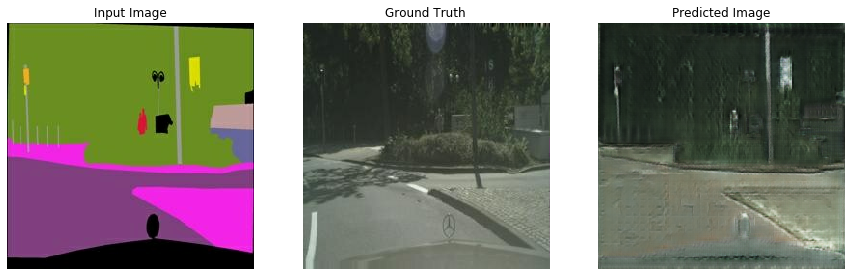

0it [00:00, ?it/s]

Time taken for epoch 20 is 100.4340569972992 sec

Epoch 21 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 21 is 99.79480123519897 sec

Epoch 22 going on....


2975it [01:39, 29.83it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 22 is 99.74578166007996 sec

Epoch 23 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 23 is 99.80022764205933 sec

Epoch 24 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 24 is 99.82919907569885 sec

Epoch 25 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 25 is 99.76137900352478 sec

Epoch 26 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 26 is 99.76447415351868 sec

Epoch 27 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 27 is 99.83363080024719 sec

Epoch 28 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 28 is 99.8315532207489 sec

Epoch 29 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 29 is 99.76405262947083 sec

Epoch 30 going on....


2975it [01:39, 29.81it/s]


Completed.


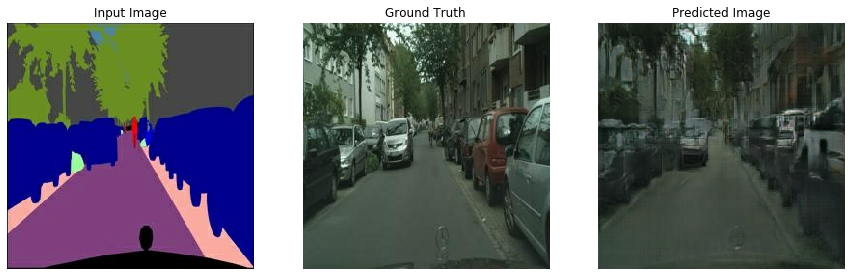

0it [00:00, ?it/s]

Time taken for epoch 30 is 100.39061260223389 sec

Epoch 31 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 31 is 99.79131126403809 sec

Epoch 32 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 32 is 99.79692387580872 sec

Epoch 33 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 33 is 99.803964138031 sec

Epoch 34 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 34 is 99.80636787414551 sec

Epoch 35 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 35 is 99.78679299354553 sec

Epoch 36 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 36 is 99.8323187828064 sec

Epoch 37 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 37 is 99.76292991638184 sec

Epoch 38 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 38 is 99.79852890968323 sec

Epoch 39 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 39 is 99.80113053321838 sec

Epoch 40 going on....


2975it [01:39, 29.81it/s]


Completed.


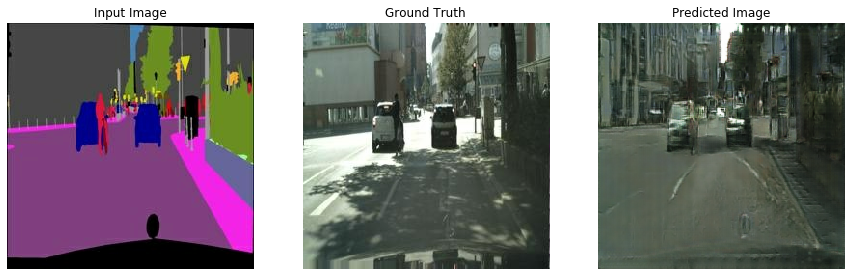

0it [00:00, ?it/s]

Time taken for epoch 40 is 100.40732479095459 sec

Epoch 41 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 41 is 99.77352905273438 sec

Epoch 42 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 42 is 99.79736018180847 sec

Epoch 43 going on....


2975it [01:39, 29.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 43 is 99.86652088165283 sec

Epoch 44 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 44 is 99.75766444206238 sec

Epoch 45 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 45 is 99.80703806877136 sec

Epoch 46 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 46 is 99.78363299369812 sec

Epoch 47 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 47 is 99.82527160644531 sec

Epoch 48 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 48 is 99.81572365760803 sec

Epoch 49 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 49 is 99.76919174194336 sec

Epoch 50 going on....


2975it [01:39, 29.80it/s]


Completed.


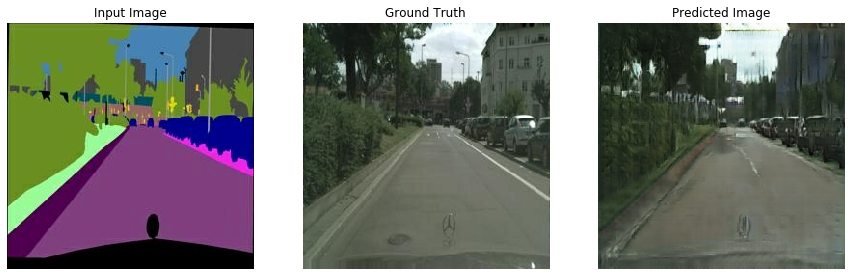

0it [00:00, ?it/s]

Time taken for epoch 50 is 100.41152930259705 sec

Epoch 51 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 51 is 99.7870819568634 sec

Epoch 52 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 52 is 99.78965353965759 sec

Epoch 53 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 53 is 99.75462317466736 sec

Epoch 54 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 54 is 99.83602380752563 sec

Epoch 55 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 55 is 99.7904884815216 sec

Epoch 56 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 56 is 99.82262587547302 sec

Epoch 57 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 57 is 99.78199553489685 sec

Epoch 58 going on....


2975it [01:39, 29.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 58 is 99.92666578292847 sec

Epoch 59 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 59 is 99.76970410346985 sec

Epoch 60 going on....


2975it [01:39, 29.80it/s]


Completed.


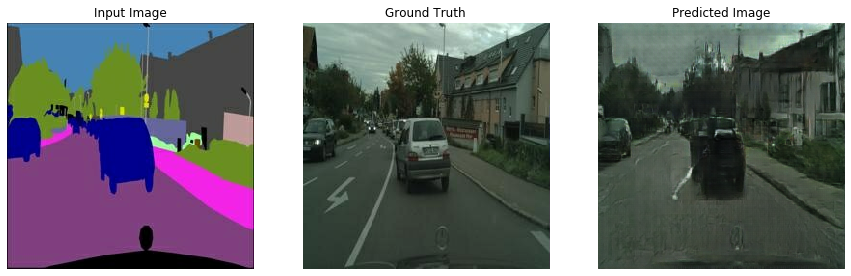

0it [00:00, ?it/s]

Time taken for epoch 60 is 100.43038749694824 sec

Epoch 61 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 61 is 99.76021385192871 sec

Epoch 62 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 62 is 99.81447458267212 sec

Epoch 63 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 63 is 99.83049273490906 sec

Epoch 64 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 64 is 99.8105137348175 sec

Epoch 65 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 65 is 99.79247856140137 sec

Epoch 66 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 66 is 99.81902241706848 sec

Epoch 67 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 67 is 99.8162088394165 sec

Epoch 68 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 68 is 99.8019335269928 sec

Epoch 69 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 69 is 99.78038835525513 sec

Epoch 70 going on....


2975it [01:39, 29.80it/s]


Completed.


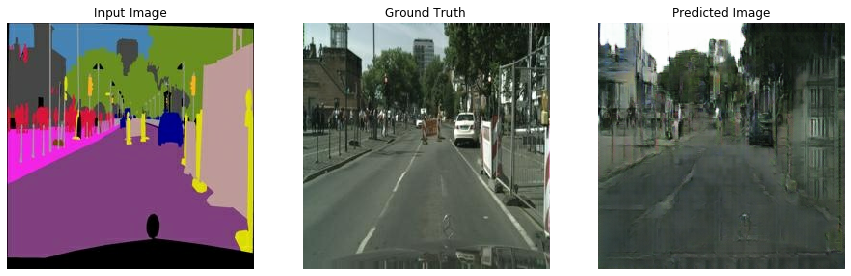

0it [00:00, ?it/s]

Time taken for epoch 70 is 100.45585346221924 sec

Epoch 71 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 71 is 99.78037929534912 sec

Epoch 72 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 72 is 99.80681848526001 sec

Epoch 73 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 73 is 99.81364297866821 sec

Epoch 74 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 74 is 99.80542850494385 sec

Epoch 75 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 75 is 99.81303334236145 sec

Epoch 76 going on....


2975it [01:39, 29.83it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 76 is 99.7438292503357 sec

Epoch 77 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 77 is 99.80954265594482 sec

Epoch 78 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 78 is 99.80260992050171 sec

Epoch 79 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 79 is 99.80192589759827 sec

Epoch 80 going on....


2975it [01:39, 29.81it/s]


Completed.


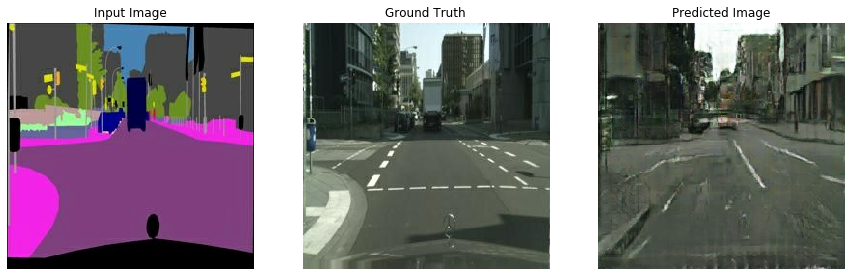

0it [00:00, ?it/s]

Time taken for epoch 80 is 100.43704724311829 sec

Epoch 81 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 81 is 99.76764798164368 sec

Epoch 82 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 82 is 99.80057764053345 sec

Epoch 83 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 83 is 99.765793800354 sec

Epoch 84 going on....


2975it [01:39, 29.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 84 is 99.85290503501892 sec

Epoch 85 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 85 is 99.77432060241699 sec

Epoch 86 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 86 is 99.82233691215515 sec

Epoch 87 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 87 is 99.80751848220825 sec

Epoch 88 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 88 is 99.78864026069641 sec

Epoch 89 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 89 is 99.81892204284668 sec

Epoch 90 going on....


2975it [01:39, 29.78it/s]


Completed.


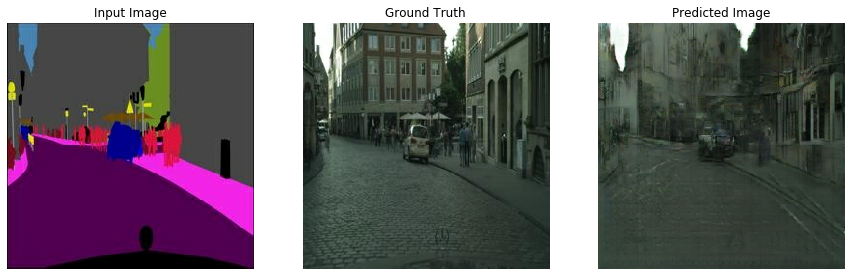

0it [00:00, ?it/s]

Time taken for epoch 90 is 100.46895170211792 sec

Epoch 91 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 91 is 99.82876801490784 sec

Epoch 92 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 92 is 99.75373435020447 sec

Epoch 93 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 93 is 99.80733227729797 sec

Epoch 94 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 94 is 99.79058337211609 sec

Epoch 95 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 95 is 99.80866384506226 sec

Epoch 96 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 96 is 99.76842498779297 sec

Epoch 97 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 97 is 99.79904675483704 sec

Epoch 98 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 98 is 99.80760049819946 sec

Epoch 99 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 99 is 99.8277804851532 sec

Epoch 100 going on....


2975it [01:39, 29.81it/s]


Completed.


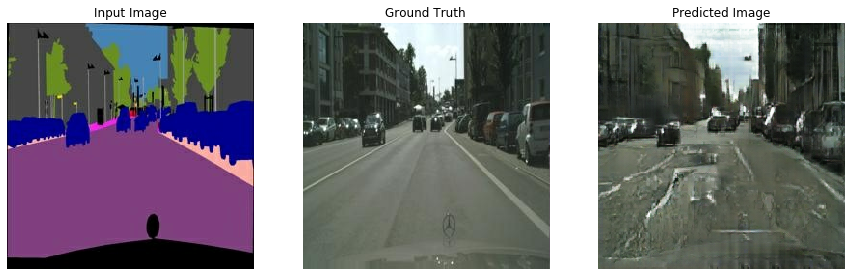

0it [00:00, ?it/s]

Time taken for epoch 100 is 100.37680530548096 sec

Epoch 101 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 101 is 99.81575560569763 sec

Epoch 102 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 102 is 99.80247902870178 sec

Epoch 103 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 103 is 99.84188914299011 sec

Epoch 104 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 104 is 99.78762650489807 sec

Epoch 105 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 105 is 99.80088376998901 sec

Epoch 106 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 106 is 99.79585242271423 sec

Epoch 107 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 107 is 99.80661249160767 sec

Epoch 108 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 108 is 99.7902135848999 sec

Epoch 109 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 109 is 99.81527185440063 sec

Epoch 110 going on....


2975it [01:39, 29.82it/s]


Completed.


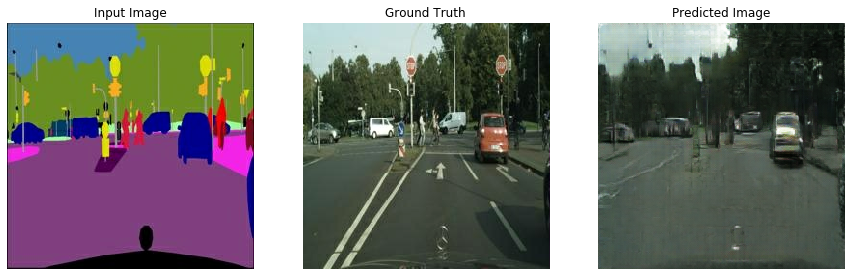

0it [00:00, ?it/s]

Time taken for epoch 110 is 100.33502244949341 sec

Epoch 111 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 111 is 99.84105777740479 sec

Epoch 112 going on....


2975it [01:39, 29.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 112 is 99.8671669960022 sec

Epoch 113 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 113 is 99.82041120529175 sec

Epoch 114 going on....


2975it [01:39, 29.79it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 114 is 99.86391854286194 sec

Epoch 115 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 115 is 99.81646513938904 sec

Epoch 116 going on....


2975it [01:39, 29.83it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 116 is 99.74955749511719 sec

Epoch 117 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 117 is 99.83300375938416 sec

Epoch 118 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 118 is 99.81465220451355 sec

Epoch 119 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 119 is 99.7747437953949 sec

Epoch 120 going on....


2975it [01:39, 29.81it/s]


Completed.


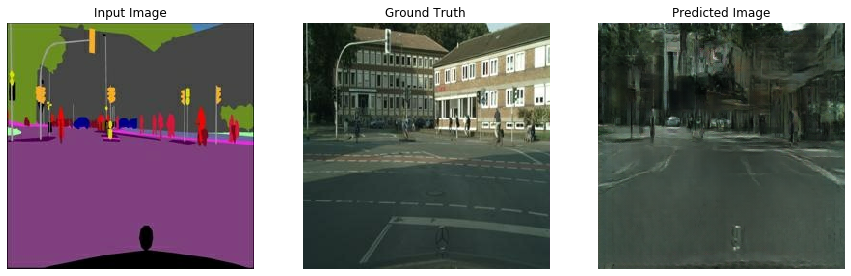

0it [00:00, ?it/s]

Time taken for epoch 120 is 100.38761806488037 sec

Epoch 121 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 121 is 99.83720254898071 sec

Epoch 122 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 122 is 99.77537655830383 sec

Epoch 123 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 123 is 99.80389261245728 sec

Epoch 124 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 124 is 99.77651476860046 sec

Epoch 125 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 125 is 99.79633665084839 sec

Epoch 126 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 126 is 99.79028916358948 sec

Epoch 127 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 127 is 99.81031727790833 sec

Epoch 128 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 128 is 99.79992151260376 sec

Epoch 129 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 129 is 99.75439882278442 sec

Epoch 130 going on....


2975it [01:39, 29.81it/s]


Completed.


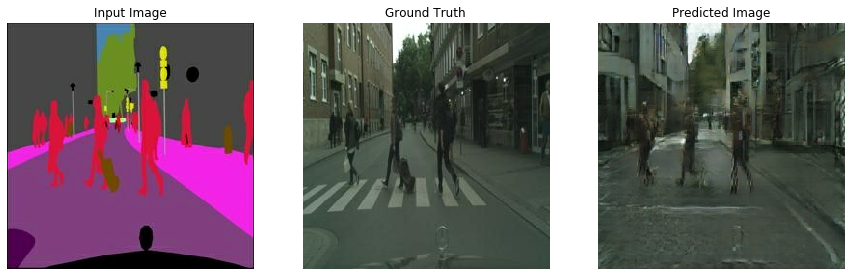

0it [00:00, ?it/s]

Time taken for epoch 130 is 100.38851642608643 sec

Epoch 131 going on....


2975it [01:39, 29.83it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 131 is 99.74218726158142 sec

Epoch 132 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 132 is 99.78404402732849 sec

Epoch 133 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 133 is 99.77478742599487 sec

Epoch 134 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 134 is 99.83067965507507 sec

Epoch 135 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 135 is 99.75881886482239 sec

Epoch 136 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 136 is 99.79005169868469 sec

Epoch 137 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 137 is 99.82645535469055 sec

Epoch 138 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 138 is 99.81327366828918 sec

Epoch 139 going on....


2975it [01:39, 29.77it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 139 is 99.94118809700012 sec

Epoch 140 going on....


2975it [01:39, 29.77it/s]


Completed.


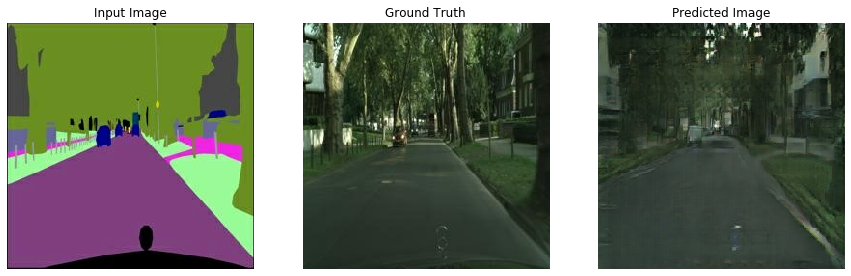

0it [00:00, ?it/s]

Time taken for epoch 140 is 100.51469731330872 sec

Epoch 141 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 141 is 99.80295324325562 sec

Epoch 142 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 142 is 99.80643486976624 sec

Epoch 143 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 143 is 99.77869772911072 sec

Epoch 144 going on....


2975it [01:39, 29.80it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 144 is 99.83276629447937 sec

Epoch 145 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 145 is 99.80565285682678 sec

Epoch 146 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 146 is 99.75994229316711 sec

Epoch 147 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 147 is 99.8088858127594 sec

Epoch 148 going on....


2975it [01:39, 29.81it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 148 is 99.799307346344 sec

Epoch 149 going on....


2975it [01:39, 29.82it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 149 is 99.7640266418457 sec

Epoch 150 going on....


2975it [01:39, 29.81it/s]


Completed.


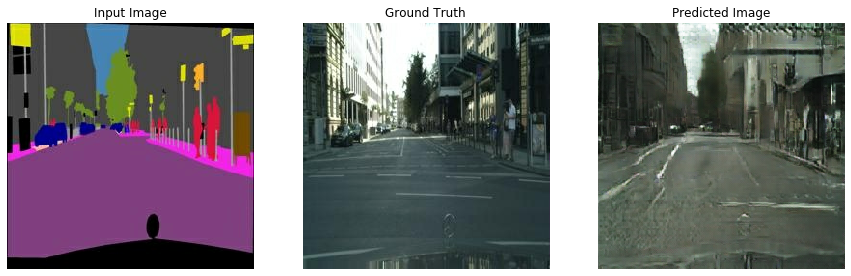

Time taken for epoch 150 is 100.37125372886658 sec



In [11]:
generator_loss_history, discriminator_loss_history = train(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer,
    train_dataset, test_dataset,
    checkpoint, checkpoint_prefix
)

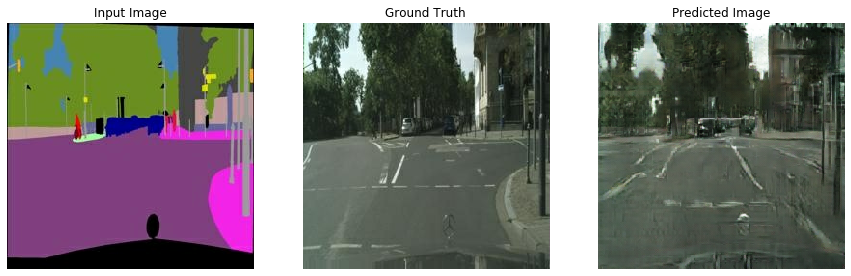

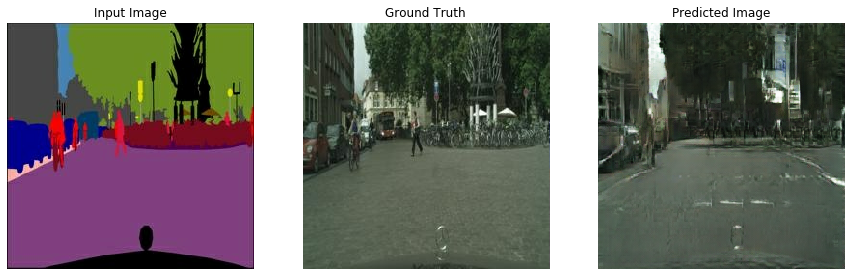

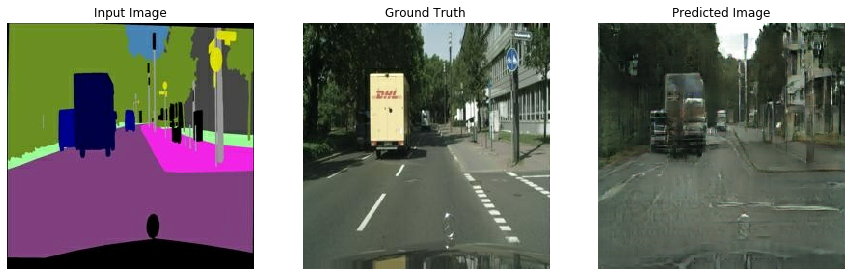

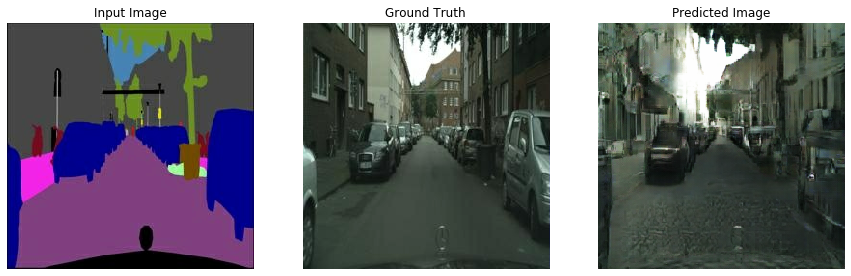

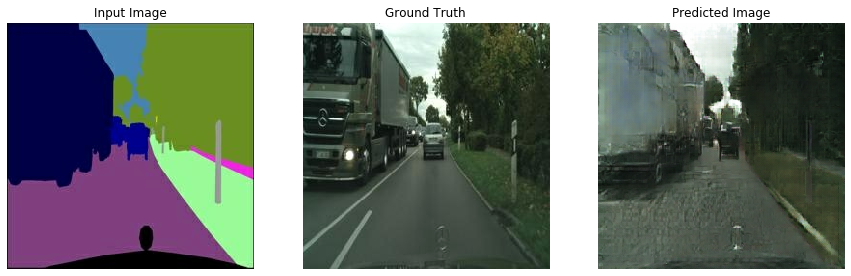

In [12]:
for _input, _target in test_dataset.take(5):
    generate_images(generator, _input, _target)